**CALLBACK FUNCTIONS**  
A callback function is a powerful tool to improve the performance of a Keras model in training, validation, and evaluation of it. Tensorboard to visualise training progress and tf.keras.callbacks.ModelCheckpoint periodically saves the model during training. This callback reduces the learning rate when a metric you've mentioned e.g. accuracy stops improving.Models often benefit from callback functions by reducing the learning rate.   

1.   early stopping callback function

1.   Tensorflow callback function 
2.   Model Checkpoint Callback function



In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
print(f'tensorflow version {tf.__version__}')
print(f'tensorflow version {tf.keras.__version__}')

tensorflow version 2.12.0
tensorflow version 2.12.0


In [ ]:
tf.config.list_physical_devices('GPU')

[]

In [ ]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
os.chdir('/content/drive/MyDrive/')

In [ ]:
os.getcwd

<function posix.getcwd()>

In [ ]:
mnist=tf.keras.datasets.mnist
mnist

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

In [ ]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train_full.shape,X_test.shape,X_train_full[0].shape

((60000, 28, 28), (10000, 28, 28), (28, 28))

In [ ]:
X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.

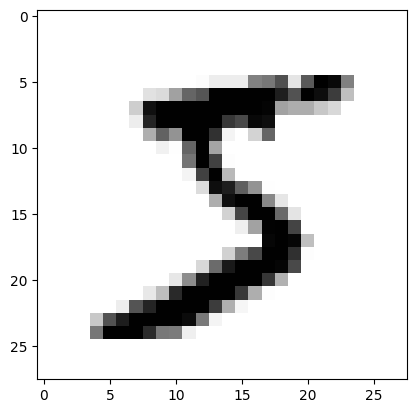

In [ ]:
plt.imshow(X_train_full[0],cmap='binary')

<Axes: >

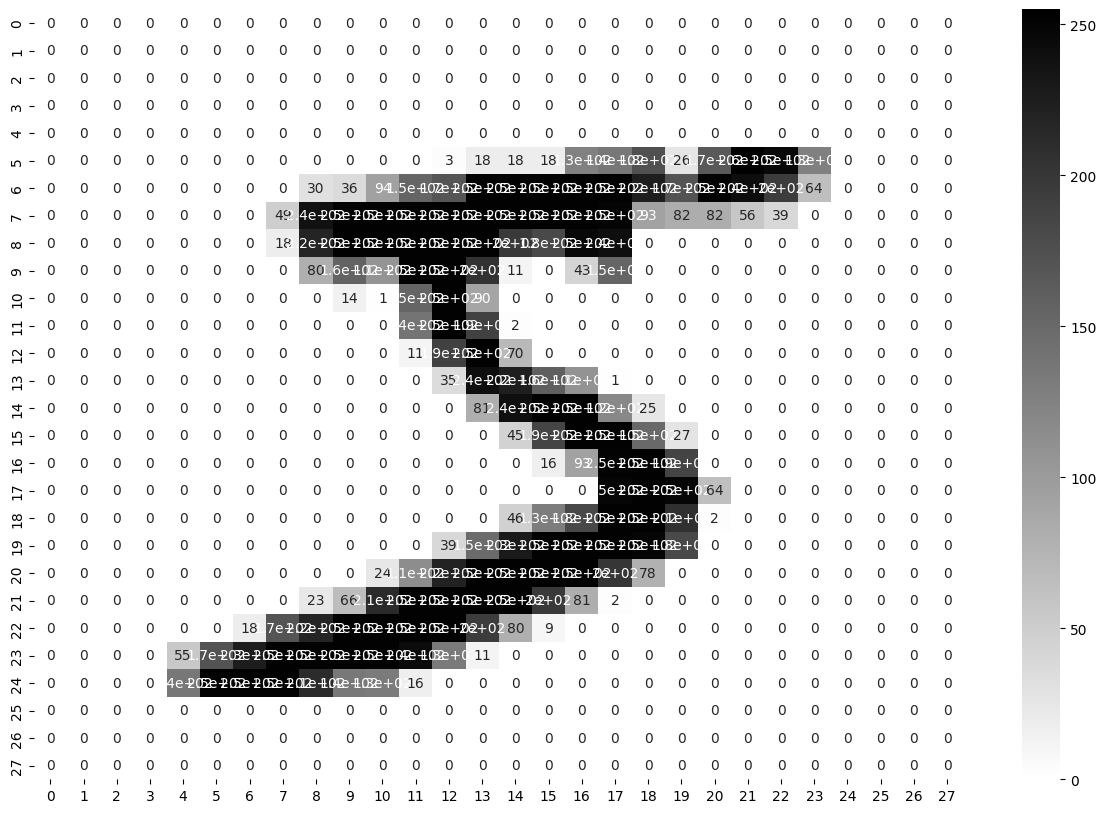

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_full[0],annot=True,cmap='binary')

In [ ]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
Layers=[    tf.keras.layers.Flatten(input_shape=[28,28],name='InputLayer'),
            tf.keras.layers.Dense(300,activation='relu',name='HiddenLayer1'),
            tf.keras.layers.Dense(100,activation='relu',name='HiddenLayer2'),
            tf.keras.layers.Dense(10,activation='softmax',name='OutputLayer')
        ]
model_clf=tf.keras.models.Sequential(Layers)
model_clf.layers

In [ ]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (Flatten)        (None, 784)               0         
                                                                 
 HiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 HiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 OutputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
784*300+300,300*100+100,100*10+10,(784*300+300+300*100+100+100*10+10)   #(784*300+300+300*100+100+100*10+10)

(235500, 30100, 1010, 266610)

In [ ]:
sum((784*300+300,300*100+100,100*10+10))

266610

In [ ]:
hidden1=model_clf.layers[1]
hidden1.name

'HiddenLayer1'

In [ ]:
hidden1.get_weights()[0].shape

(784, 300)

In [ ]:
weights,biases=hidden1.get_weights()
biases.shape,biases

((300,),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
   

In [ ]:
loss_function,optimiser,metrics='sparse_categorical_crossentropy','SGD','accuracy'
model_clf.compile(optimizer=optimiser,loss=loss_function,metrics=metrics)

**TensorBoard Callback Functions**

In [ ]:
import time
def get_log_path(log_dir='logs/fit'):
  fileName=time.strftime('log_%Y_%m_%d_H%_M%_S%')
  logs_path=os.path.join(log_dir,fileName)
  print(f'saving logs at {logs_path}')
  return logs_path

log_dir=get_log_path()
tb_cb=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

saving logs at logs/fit/log_2023_06_10_H2117%


**Early Stopping CallBacks**

In [ ]:
## If the monitor parameter is not set in this function then the parameter will be set to monitoring the val_loss_metric 
early_stoppingcb=tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)

**Model Checking Callback**

In [ ]:
CKPT_path='Model_ckpt.h5'
checkpoinitng_cb=tf.keras.callbacks.ModelCheckpoint(CKPT_path,save_best_only=True)

In [66]:
epochs=30
validation_set=(X_valid,y_valid)
history_init=model_clf.fit(X_train,y_train,validation_data=validation_set,batch_size=32,epochs=30)

Epoch 1/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.0107 - accuracy: 0.9990 - val_loss: 0.0682 - val_accuracy: 0.9820
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0102 - accuracy: 0.9991 - val_loss: 0.0694 - val_accuracy: 0.9832
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0097 - accuracy: 0.9993 - val_loss: 0.0678 - val_accuracy: 0.9828
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0093 - accuracy: 0.9993 - val_loss: 0.0692 - val_accuracy: 0.9828
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0088 - accuracy: 0.9994 - val_loss: 0.0687 - val_accuracy: 0.9818
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0086 - accuracy: 0.9994 - val_loss: 0.0701 - val_accuracy: 0.9818
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0081 - accuracy: 0.9995 - val_loss: 0.0706 - val_accura

In [68]:
res_init=pd.DataFrame(history_init.history)
res_init

,loss,accuracy,val_loss,val_accuracy
0,0.010744,0.998964,0.068245,0.9820
1,0.010198,0.999091,0.069443,0.9832
2,0.009702,0.999273,0.067777,0.9828
3,0.009265,0.999291,0.069181,0.9828
4,0.008845,0.999364,0.068703,0.9818
5,0.008557,0.999382,0.070129,0.9818
6,0.008090,0.999473,0.070632,0.9828
7,0.007750,0.999509,0.069876,0.9828
8,0.007407,0.999527,0.068329,0.9822
9,0.007114,0.999636,0.069441,0.9830


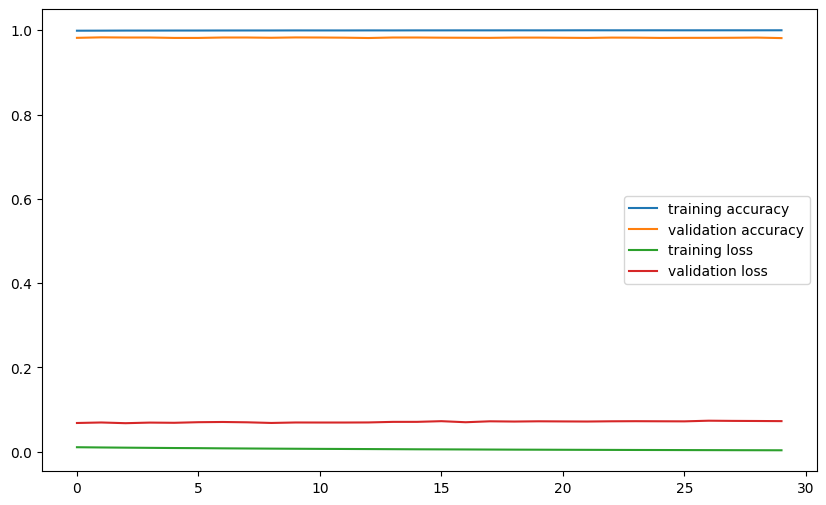

In [71]:
plt.figure(figsize=(10,6))
plt.plot(res_init['accuracy'],label='training accuracy')
plt.plot(res_init['val_accuracy'],label='validation accuracy')
plt.plot(res_init['loss'],label='training loss')
plt.plot(res_init['val_loss'],label='validation loss')
plt.legend(loc='center right')

In [72]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0758 - accuracy: 0.9807


[0.07580579072237015, 0.9807000160217285]

**Training the Callback Model**

In [ ]:
ckpt_model=tf.keras.models.load_model(CKPT_path)
history=ckpt_model.fit(X_train,y_train,validation_data=validation_set,callbacks=[tb_cb,early_stoppingcb,checkpoinitng_cb],batch_size=32,epochs=10)

Epoch 1/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0309 - accuracy: 0.9927 - val_loss: 0.0703 - val_accuracy: 0.9814
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0291 - accuracy: 0.9935 - val_loss: 0.0681 - val_accuracy: 0.9810
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0274 - accuracy: 0.9938 - val_loss: 0.0694 - val_accuracy: 0.9818
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.0260 - accuracy: 0.9941 - val_loss: 0.0704 - val_accuracy: 0.9810
Epoch 5/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0244 - accuracy: 0.9952 - val_loss: 0.0675 - val_accuracy: 0.9826
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0231 - accuracy: 0.9954 - val_loss: 0.0681 - val_accuracy: 0.9820
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.0220 - accuracy: 0.9958 - val_loss: 0.0678 - val_accura

**SAVING THE MODEL**

In [ ]:
import time
def save_model_path(MODEL_dir='trained model'):
  os.makedirs(MODEL_dir,exist_ok=True)
  file_name=time.strftime('Model_%Y_%m_%d_%H_%M_%S_.h5')
  model_path=os.path.join(MODEL_dir,file_name)
  print(f'model {file_name} will be saved at {model_path}')
  return model_path
unique_path=save_model_path()
unique_path

model Model_2023_06_10_11_54_37_.h5 will be saved at trained model/Model_2023_06_10_11_54_37_.h5


'trained model/Model_2023_06_10_11_54_37_.h5'

In [ ]:
unique_path

'trained model/Model_2023_06_10_11_54_37_.h5'

In [ ]:
tf.keras.models.save_model(model_clf,unique_path)

In [ ]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

**Evaluation of the Callback Model**

In [ ]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.030850,0.992727,0.070342,0.9814
1,0.029130,0.993509,0.068125,0.9810
2,0.027429,0.993800,0.069444,0.9818
3,0.026037,0.994109,0.070434,0.9810
4,0.024363,0.995164,0.067507,0.9826
5,0.023130,0.995418,0.068109,0.9820
6,0.022001,0.995764,0.067845,0.9818
7,0.020714,0.996127,0.067299,0.9820
8,0.019657,0.996564,0.067057,0.9816
9,0.018710,0.996855,0.066907,0.9814


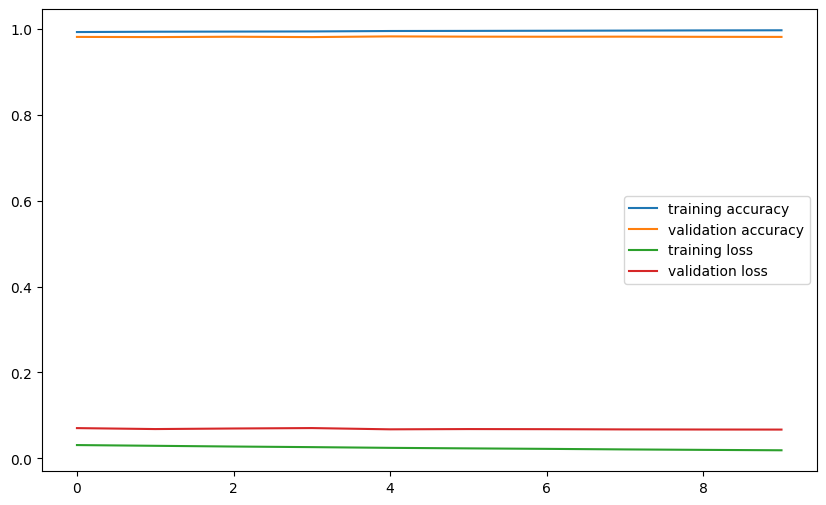

In [ ]:
res=pd.DataFrame(history.history)
plt.figure(figsize=(10,6))
plt.plot(res['accuracy'],label='training accuracy')
plt.plot(res['val_accuracy'],label='validation accuracy')
plt.plot(res['loss'],label='training loss')
plt.plot(res['val_loss'],label='validation loss')
plt.legend(loc='center right')     ## this can also be implemented using history.plot

In [ ]:
model_clf.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0737 - accuracy: 0.9780


[0.0737076848745346, 0.9779999852180481]

**SAMPLE CHECK OF TEST DATA**

In [ ]:
X_new=X_test[:3]
actual=y_test[:3]
actual

array([7, 2, 1], dtype=uint8)

<Axes: >

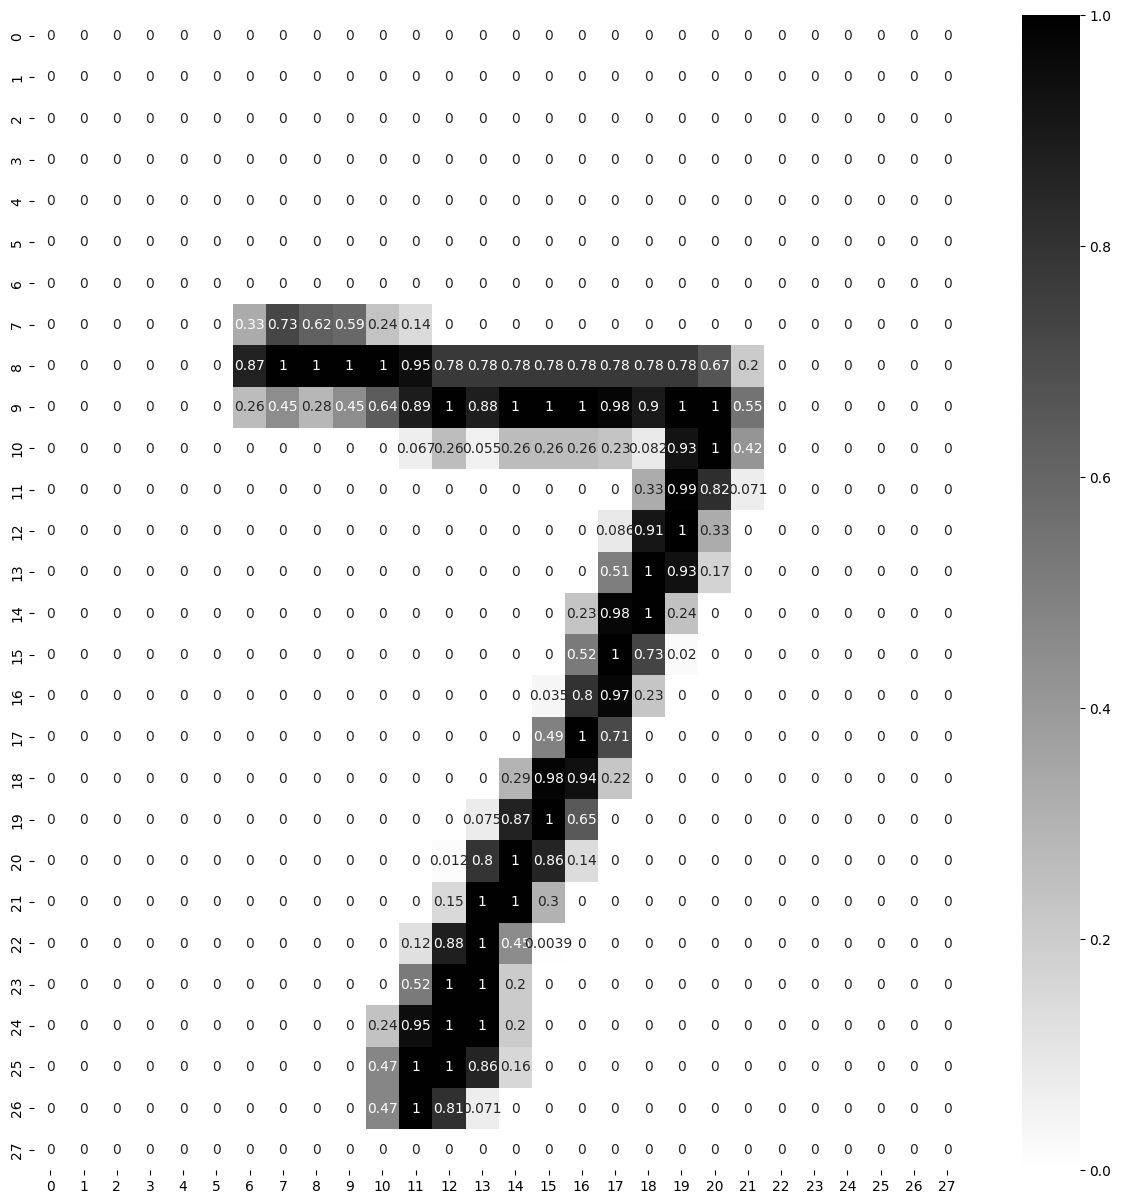

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(X_test[0],annot=True,cmap='binary')

In [ ]:
y_prob=model_clf.predict(X_new)
y_prob.round(3)

1/1 [==============================] - 0s 99ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.997, 0.001, 0.   , 0.   , 0.   , 0.   , 0.001, 0.001,
        0.   ]], dtype=float32)

In [ ]:
y_prob

array([[6.9409367e-07, 9.0840810e-09, 5.6873407e-05, 2.3966943e-04,
        6.9735262e-09, 1.1660520e-06, 1.4965442e-11, 9.9966276e-01,
        6.1072114e-06, 3.2759661e-05],
       [5.6091426e-07, 2.2473349e-05, 9.9993026e-01, 4.3602970e-05,
        1.0042744e-12, 2.5783271e-07, 7.6142015e-07, 2.9250841e-11,
        2.1719202e-06, 1.1381786e-12],
       [4.6710079e-06, 9.9734938e-01, 7.3061849e-04, 9.0740607e-05,
        2.1762514e-04, 1.3221076e-04, 9.4889510e-05, 7.1870908e-04,
        6.3514593e-04, 2.5976649e-05]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_prob,axis=-1)
actual

array([7, 2, 1], dtype=uint8)

In [ ]:
y_pred

array([7, 2, 1])